In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import img_to_array


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


import time
import os
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19




# https://keras.io/api/applications/

### addressing roots

In [ ]:
cells = "/content/drive/MyDrive/cell_images/"

detected = "Parasitized/"
not_detected = "Uninfected/"

parasitized = os.listdir(cells+detected)
uninfected = os.listdir(cells+not_detected)

print(f'count parasitized cells ---- > {len(parasitized)}')
print(f'count uninfected cells ---- > {len(uninfected)}')

count parasitized cells ---- > 5330
count uninfected cells ---- > 11015


### visualization

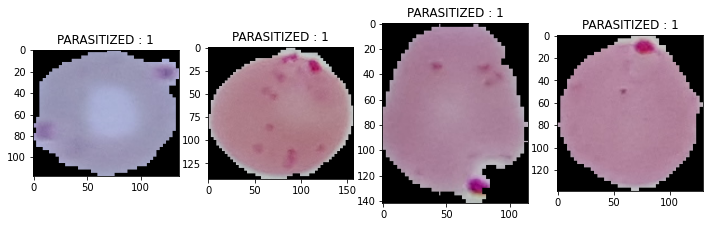

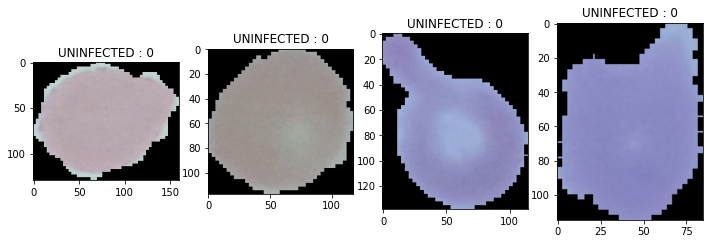

In [ ]:
plt.figure(figsize = (12,24))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(cells+detected+ parasitized[i])
    # print(parasitized[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
plt.show()

plt.figure(figsize = (12,24))
for i in range(4):
    plt.subplot(2, 4, i+1)
    img = cv2.imread(cells+not_detected+uninfected[i])
    # print(uninfected[i])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
plt.show()

<!-- ### balancing  -->

### creating 2 list from 
##### 1.labels
##### 2.image paths

In [ ]:
paths = []
labels = [] 

for label in os.listdir(cells) :
    path = os.path.join(cells+label)
    for img in os.listdir(path):
        img_path = os.path.join(path+'/'+img)
        if img_path.split('.')[-1] == 'png':
            paths.append(img_path)
            labels.append(img_path.split('/')[-2])


print(f'labels ---- > {len(labels)}')
print(f'paths ---- > {len(paths)}')

labels ---- > 16344
paths ---- > 16344


### dataframe

In [ ]:
df = pd.DataFrame({
    'labels' :labels ,
    'paths' : paths 
} , columns=['labels' , 'paths'])
df

,labels,paths
0,Uninfected,/content/drive/MyDrive/cell_images/Uninfected/...
1,Uninfected,/content/drive/MyDrive/cell_images/Uninfected/...
2,Uninfected,/content/drive/MyDrive/cell_images/Uninfected/...
3,Uninfected,/content/drive/MyDrive/cell_images/Uninfected/...
4,Uninfected,/content/drive/MyDrive/cell_images/Uninfected/...
...,...,...
16339,Parasitized,/content/drive/MyDrive/cell_images/Parasitized...
16340,Parasitized,/content/drive/MyDrive/cell_images/Parasitized...
16341,Parasitized,/content/drive/MyDrive/cell_images/Parasitized...
16342,Parasitized,/content/drive/MyDrive/cell_images/Parasitized...


In [ ]:
df['labels'].value_counts()

Uninfected     11014
Parasitized     5330
Name: labels, dtype: int64

### sampling

In [ ]:
n=5000

uninfected =  df[df['labels'] == 'Uninfected'][:n]
parasitized = df[df['labels'] == 'Parasitized'][:n]

final_df = pd.concat([uninfected , parasitized] , axis=0)
final_df = final_df.reset_index(drop=True)

In [ ]:
final_df

,labels,paths
0,Uninfected,/content/drive/MyDrive/cell_images/Uninfected/...
1,Uninfected,/content/drive/MyDrive/cell_images/Uninfected/...
2,Uninfected,/content/drive/MyDrive/cell_images/Uninfected/...
3,Uninfected,/content/drive/MyDrive/cell_images/Uninfected/...
4,Uninfected,/content/drive/MyDrive/cell_images/Uninfected/...
...,...,...
9995,Parasitized,/content/drive/MyDrive/cell_images/Parasitized...
9996,Parasitized,/content/drive/MyDrive/cell_images/Parasitized...
9997,Parasitized,/content/drive/MyDrive/cell_images/Parasitized...
9998,Parasitized,/content/drive/MyDrive/cell_images/Parasitized...


In [ ]:
final_df=final_df.sample(frac=1)


### (1)preprocessing images(turning image path to array form)
    1. by cv2.imread
    2. by plt.imread
    3. by load_img and img_to_array from keras 

    and after that train_test_split



### (2)or use the paths directly by image data generator preprocessing labels


100%|██████████| 10/10 [00:20<00:00,  2.07s/it]


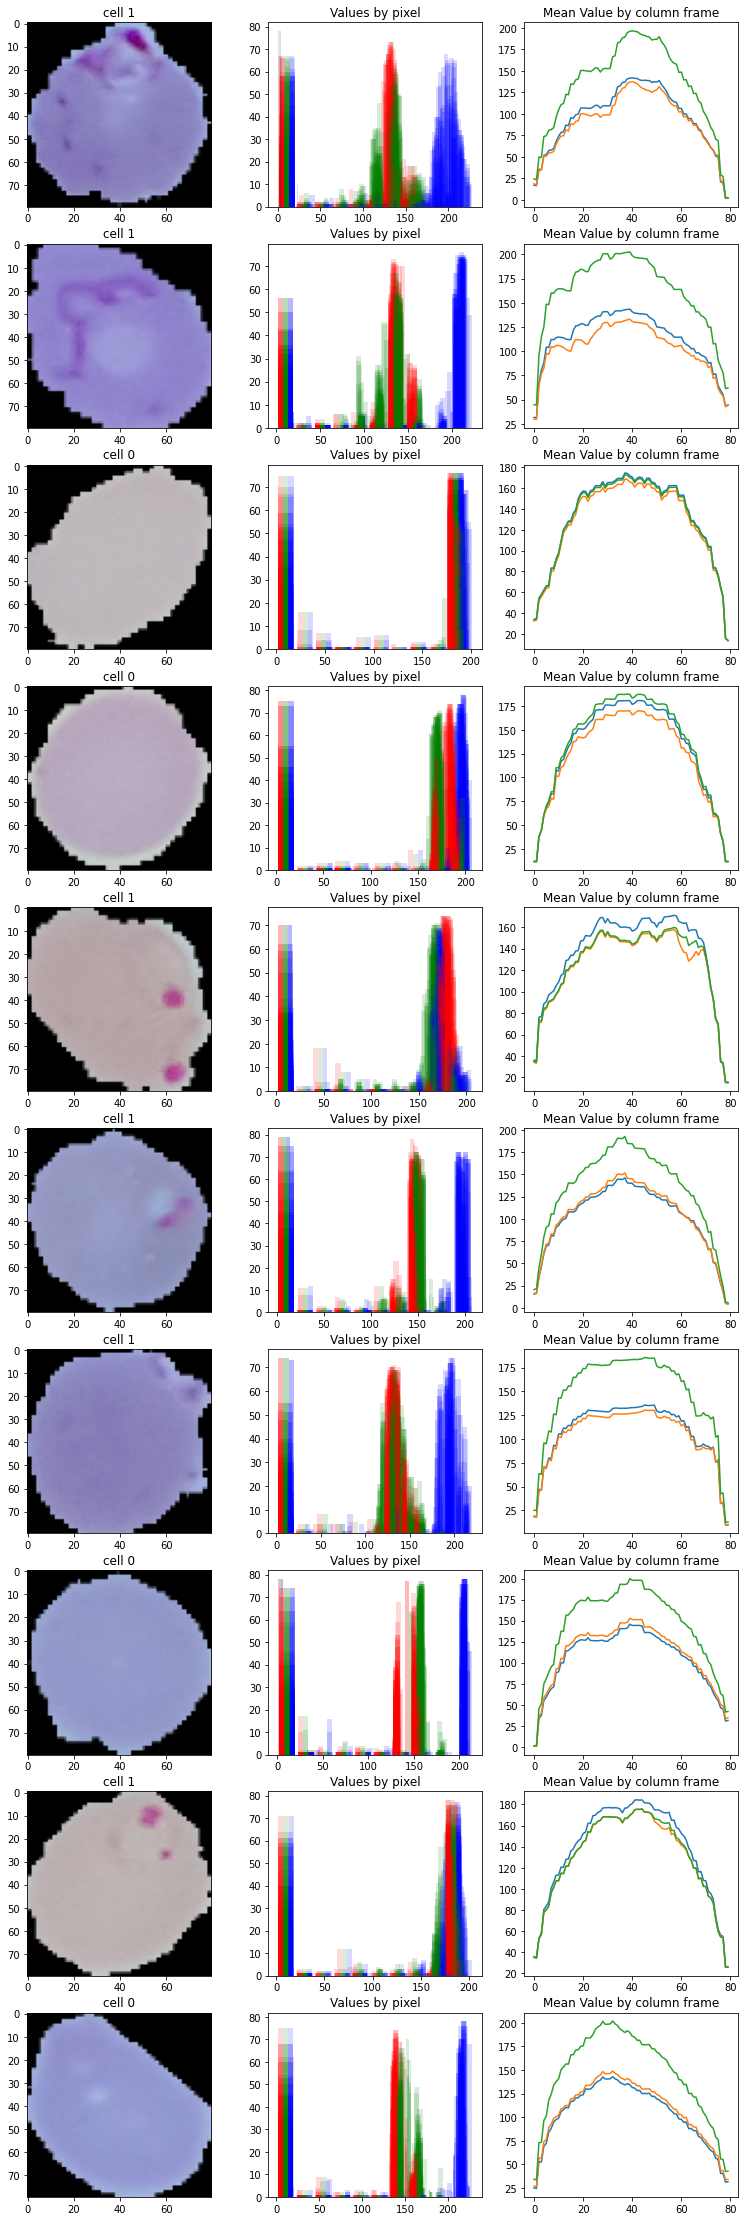

In [ ]:

data = []
for path in final_df['paths'][:10] :
  image = cv2.imread(path)
  image = cv2.resize(image , (80,80))
  data.append(image)


target = []
for label in final_df['labels'][:10]:
  if label == 'Uninfected':
    target.append(0)
  elif label == 'Parasitized':
    target.append(1)

target = np.array(target)
data = np.array(data)



fig , axis = plt.subplots(10,3,figsize=(13,40))

for k in tqdm(range(10)):

  # image
  axis[k][0].imshow(data[k] , cmap='gray')
  axis[k][0].set_title(f'cell {target[k]}')

  # hist 
  for i in range(data[k].shape[0]):
    axis[k][1].hist(data[k][i] , color=['r','g','b'] , alpha=0.15)
  axis[k][1].set_title('Values by pixel')

  axis[k][2].plot(np.mean(data[k] , axis=0))
  axis[k][2].set_title('Mean Value by column frame')


plt.show()

### data split

In [ ]:
# train = final_df.iloc[:7000]
# validation = final_df.iloc[7000:9500]

train = final_df.iloc[:9500]
test = final_df.iloc[9500:]

### images generator

    1.imagedatagenerator 
    2.traintestsplit

In [ ]:

generator = ImageDataGenerator(
        horizontal_flip=True,
        vertical_flip=True,
        rotation_range=45,
        shear_range=16,
        rescale=1.0/255,
        validation_split=0.3
        )


generator_test = ImageDataGenerator(
        rescale=1.0/255,
)

In [ ]:
train_generator      = generator.flow_from_dataframe(dataframe=train , 
                                                     x_col='paths',
                                                     color_mode="rgb",
                                                     target_size=(96,96),
                                                     y_col='labels' , 
                                                     seed=42 , 
                                                     class_mode='categorical' ,
                                                     subset='training')


validation_generator = generator.flow_from_dataframe(dataframe=train ,
                                                     x_col='paths',
                                                     color_mode="rgb",
                                                     target_size=(96,96),
                                                     y_col='labels' , 
                                                     seed=42 , 
                                                     class_mode='categorical' , 
                                                     subset='validation')


test_generator       = generator_test.flow_from_dataframe(dataframe=test , 
                                                          x_col='paths',
                                                          color_mode="rgb",
                                                          target_size=(96,96), 
                                                          y_col='labels' ,
                                                          seed=42 , 
                                                          class_mode='categorical')

Found 6650 validated image filenames belonging to 2 classes.
Found 2850 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.


### models

In [ ]:
applications = [
                ResNet50(include_top=False , input_shape=(96,96,3)),
                ResNet152V2(include_top=False , input_shape=(96,96,3)),
                Xception(include_top=False, input_shape=(96,96,3)),
                InceptionResNetV2(include_top=False, input_shape=(96,96,3)),
                InceptionV3(include_top=False, input_shape=(96,96,3)),
                MobileNetV2(include_top=False, input_shape=(96,96,3)),
                DenseNet201(include_top=False, input_shape=(96,96,3)),
                VGG16(include_top=False),
                VGG19(include_top=False),
                ]
for model in applications:
  L = 0
  for layer in model.layers:
    L+=1
  print(f"{model.name} ----> {L}")



80142336/80134624 [==============================] - 1s 0us/step
resnet50 ----> 175
resnet152v2 ----> 564
xception ----> 132
inception_resnet_v2 ----> 780
inception_v3 ----> 311
mobilenetv2_1.00_96 ----> 154
densenet201 ----> 707
vgg16 ----> 19
vgg19 ----> 22


In [ ]:
def plot_training(H, epochs):
  # construct a plot that plots and saves the training history
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Loss/Accuracy")
  plt.legend(loc="lower left")
  plt.show()

In [ ]:
from types import MemberDescriptorType
def get_cnn(model_name , input_shape=(96,96,3) , num_class=2 , batch_size=32 ,freeze_layer = 100):
  # channle last base
  if model_name =='ResNet50' :
    base_model = ResNet50(include_top=False , input_shape=input_shape)
  elif model_name =='ResNet152V2' :
    base_model = ResNet152V2(include_top=False , input_shape=input_shape)
  elif model_name =='Xception' :
    base_model = Xception(include_top=False , input_shape=input_shape)
  elif model_name =='InceptionResNetV2' :
    base_model = InceptionResNetV2(include_top=False , input_shape=input_shape)
  elif model_name =='InceptionV3' :
    base_model = InceptionV3(include_top=False , input_shape=input_shape)
  elif model_name =='MobileNetV2' :
    base_model = MobileNetV2(include_top=False , input_shape=input_shape)
  elif model_name =='DenseNet201' :
    base_model = DenseNet201(include_top=False , input_shape=input_shape)
  elif model_name =='VGG16' :
    base_model = VGG16(include_top=False , input_shape=input_shape)
  elif model_name =='VGG19' :
    base_model = VGG19(include_top=False , input_shape=input_shape)


  # head_model = base_model.output

  inputs = Input(input_shape)
  head_model = base_model(inputs)
  head_model = Flatten(name='flatten')(head_model)
  head_model = Dense(512 , activation='relu')(head_model)
  head_model = Dropout(0.2)(head_model)
  head_model = BatchNormalization()(head_model)
  head_model = Dense(num_class , activation='softmax')(head_model)


  final_model = Model(
      inputs = inputs ,
      outputs = head_model
  )

  print('[info]...freezing base model layers')
  for layer in base_model.layers:
    layer.trainable = False

  print('[info]...compiling head model')
  opt = SGD(learning_rate=1e-1 , momentum=0.9)
  final_model.compile(loss = 'categorical_crossentropy' ,
                      optimizer = opt ,
                      metrics = ['accuracy'])
  
  EPOCHS = 12
  print('[info]...training head model')
  H = final_model.fit(x=train_generator , 
                validation_data=validation_generator , 
                validation_steps=validation_generator.n//32 ,
                steps_per_epoch =train_generator.n//32 , 
                epochs = EPOCHS 
                )
  

  print('[info]...evaluation after head model fine tuning')
  test_generator.reset()
  preds = final_model.predict(x=test_generator , steps =test_generator.n//batch_size)
  pred = np.argmax(preds , axis=1)
  report = classification_report(test_generator.classes , pred , target_names = test_generator.class_indices.keys())
  print(f'[info]...classification report : \n{report}')

  print('[info]...plotting')
  plot_training(H, EPOCHS)



  train_generator.reset()
  validation_generator.reset()

  for layer in base_model.layers:
	  layer.trainable = True

  print(final_model.summary())
    
  return final_model

In [ ]:
def custom_cnn(input_shape=(96,96,3) , num_class=2):
  
  model = Sequential()
    
  model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding="same", input_shape=input_shape))
  model.add(Conv2D(16, (3, 3), padding="same", activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))
  model.add(BatchNormalization())

  model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
  model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))
  model.add(BatchNormalization())

  model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))
  model.add(BatchNormalization())

  model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
  model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))
  model.add(BatchNormalization())

  model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
  model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))
  model.add(BatchNormalization())

  model.add(Flatten())
  
  model.add(Dropout(0.5))
  model.add(BatchNormalization())
  
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(BatchNormalization())
  
  model.add(Dense(num_class , activation='softmax'))

  print(model.summary())
  
  return model
  

In [ ]:

EarlyStopping = EarlyStopping(patience=2)
ReduceLROnPlatea = ReduceLROnPlateau()

model = get_cnn(model_name='MobileNetV2')
# model = custom_cnn()


callbacks = [EarlyStopping,ReduceLROnPlatea]

In [ ]:
print('[info]...compiling main model')
model.compile(optimizer = 'adam' ,
              loss = 'categorical_crossentropy' , 
              metrics = ['accuracy'])

In [ ]:

print('[info]...training start')
start = time.time()
history = model.fit(
    x=train_generator , 
    validation_data = validation_generator , 
    steps_per_epoch = train_generator.n ,
    validation_steps = validation_generator.n , 
    callbacks = callbacks ,
    epochs = 30
)
end = time.time()
print('[info]...training finish')
print(f'[info]...estimated time ----> {end-start}')

In [ ]:
prediction = model.predict(
    x=test_generator ,
    steps = test_generator.n
)


predicted = np.argmax(prediction , axis=1)

calssification = classification_report(test_generator.classes ,
                                       predicted ,
                                       target_names=test_generator.class_indices.keys())
print(f'[info]...classification report : \n{calssification}')


In [ ]:
plot_training(history , 30)